In [1]:
from src.base_models import *
from src.dataset_lib import *
from src.ode_solvers import *
from src.comp_models import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

c:\Users\JoCraft\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [2]:
GaussianMix = GaussianMixture.symmetric_2D(4,1.0)

gaussian_path = GaussianConditionalProbabilityPath(p_data=GaussianMix, alpha=LinearAlpha(), beta = SquareRootBeta(), device=device).to(device)

model1 = BasicMLP(input_dim=2, hidden_dims=[64,64,64,64])

trainer = FlowDiffTrainer(path=gaussian_path, modeltype="Diffusion", model=model1)

trainer.train_loop(num_epochs=20000, device=device, lr=1e-3, n= 1000)

In Epoch 0 we have a loss of 10.488762855529785
In Epoch 1000 we have a loss of 7.080385684967041
In Epoch 2000 we have a loss of 4.7621073722839355
In Epoch 3000 we have a loss of 6.983295440673828
In Epoch 4000 we have a loss of 11.472344398498535
In Epoch 5000 we have a loss of 8.91001033782959
In Epoch 6000 we have a loss of 4.83975887298584
In Epoch 7000 we have a loss of 8.291335105895996
In Epoch 8000 we have a loss of 6.165627479553223
In Epoch 9000 we have a loss of 6.219409942626953
In Epoch 10000 we have a loss of 18.366008758544922
In Epoch 11000 we have a loss of 4.0706658363342285
In Epoch 12000 we have a loss of 102.98926544189453
In Epoch 13000 we have a loss of 11.335705757141113
In Epoch 14000 we have a loss of 12.094705581665039
In Epoch 15000 we have a loss of 6.844470500946045
In Epoch 16000 we have a loss of 39.278953552246094
In Epoch 17000 we have a loss of 5.362971782684326
In Epoch 18000 we have a loss of 9.396728515625
In Epoch 19000 we have a loss of 4.54892

In [3]:
swiss = RectangleDataset(device=device, x_coords=(-5.0,5.0), y_coords=(-10,10))

gaussian_path2 = GaussianConditionalProbabilityPath(p_data=swiss, alpha=LinearAlpha(), beta = SquareRootBeta(), device=device).to(device)

model2 = BasicMLP(input_dim=2, hidden_dims=[64,64,64,64])

trainer2 = FlowDiffTrainer(path=gaussian_path2, modeltype="Diffusion", model=model2)

trainer2.train_loop(num_epochs=20000, device=device, lr=1e-3, n= 1000)

In Epoch 0 we have a loss of 5.998692035675049
In Epoch 1000 we have a loss of 13.834152221679688
In Epoch 2000 we have a loss of 10.184111595153809
In Epoch 3000 we have a loss of 5.530916213989258
In Epoch 4000 we have a loss of 4.786180019378662
In Epoch 5000 we have a loss of 7.554311752319336
In Epoch 6000 we have a loss of 4.368805408477783
In Epoch 7000 we have a loss of 13.744836807250977
In Epoch 8000 we have a loss of 5.26893949508667
In Epoch 9000 we have a loss of 6.168139457702637
In Epoch 10000 we have a loss of 5.097789764404297
In Epoch 11000 we have a loss of 9.300119400024414
In Epoch 12000 we have a loss of 28.082666397094727
In Epoch 13000 we have a loss of 8.020358085632324
In Epoch 14000 we have a loss of 15.13090991973877
In Epoch 15000 we have a loss of 8.132262229919434
In Epoch 16000 we have a loss of 5.955260753631592
In Epoch 17000 we have a loss of 10.605656623840332
In Epoch 18000 we have a loss of 22.5183162689209
In Epoch 19000 we have a loss of 10.26897

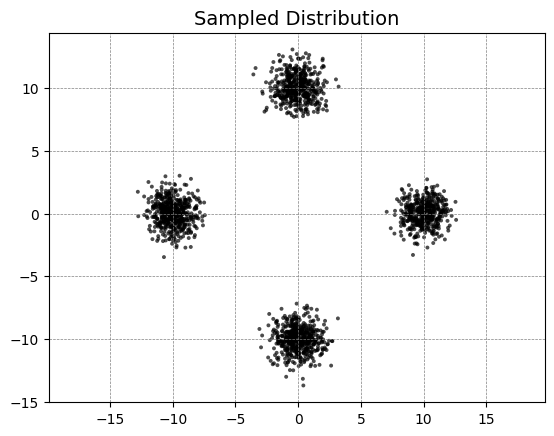

In [4]:
plot_samples(GaussianMix.sample(2000))
plt.show()

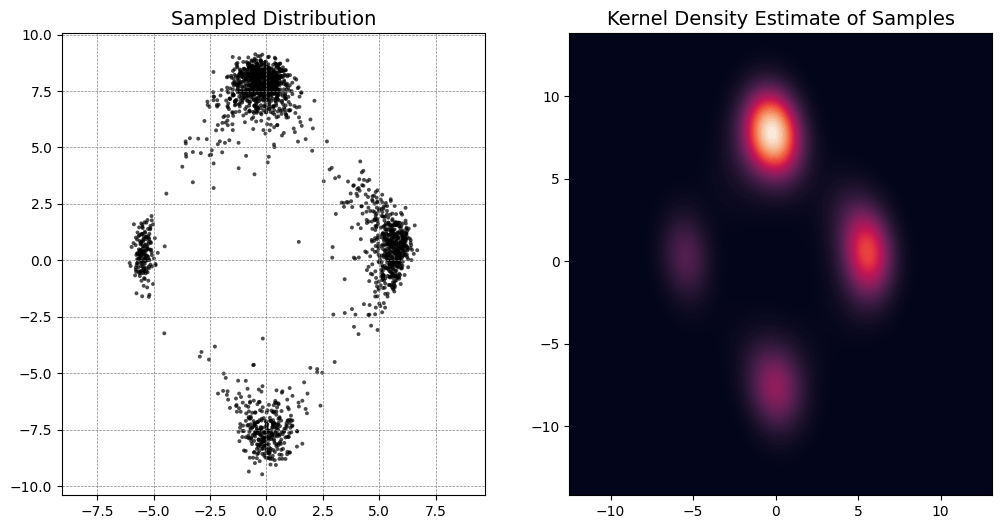

In [5]:
models = [model1,model2]

sde = CompLangevin(models=models, sigma = 0.5, alpha = LinearAlpha(), beta=SquareRootBeta())

comp_solver = EulerSDESolver(sde)

comp_sampler = Sampler(comp_solver)

steps= torch.linspace(0.01, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device) 
samples = comp_sampler.sample_without_traj(gaussian_path.p_init.sample(2000), steps)
figsize=(12, 6)

fig, axes = plt.subplots(1, 2, figsize = figsize)
plot_samples(samples, ax=axes[0], kde=True)
plot_kde(samples, ax = axes[1], cmap="rocket")

plt.show()

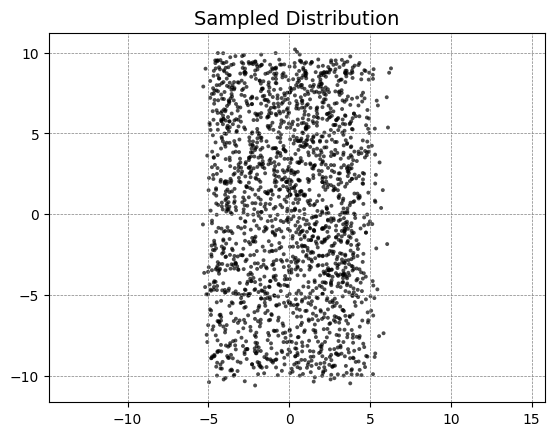

In [6]:
models = [model2]

sde = CompLangevin(models=models, sigma = 1, alpha = LinearAlpha(), beta=SquareRootBeta())

comp_solver = EulerSDESolver(sde)

comp_sampler = Sampler(comp_solver)

steps= torch.linspace(0.05, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device) 

plot_samples(comp_sampler.sample_without_traj(gaussian_path.p_init.sample(2000), steps),contour=False)

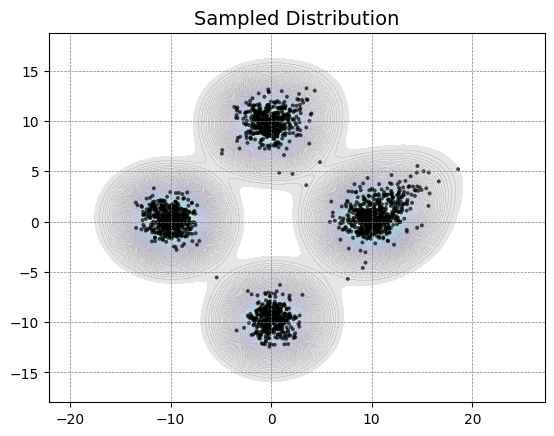

In [7]:
models = [model1]

sde = CompLangevin(models=models, sigma = 1, alpha = LinearAlpha(), beta=SquareRootBeta())

comp_solver = EulerSDESolver(sde)

comp_sampler = Sampler(comp_solver)

steps= torch.linspace(0.01, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device) 

plot_samples(comp_sampler.sample_with_traj(gaussian_path.p_init.sample(2000), steps)[-1], scatter=True,kde=True)